# Exam 3

For questions 1-3 use the file 2015_CHR_Analytic_Data.csv that is added to this folder. This file needs some cleaning before use (you can use any language for this step R, python etc) (10 points)

1. Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data. 

2. Only counties with at least 30,000 people according to “2011 population estimate Value”.
3. Only columns ending in “Value” (plus the county code). To check, here is the complete list:

    -('COUNTYCODE’, 'Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing problems Value', 'Driving alone to work Value', 'Long commute - driving alone Value', '2011 population estimate Value', 'Population that is not proficient in English Value', 'Population living in a rural area Value', 'Diabetes Value', 'HIV prevalence rate Value', 'Premature age-adjusted mortality Value', 'Infant mortality Value', 'Child mortality Value', 'Food insecurity Value', 'Limited access to healthy foods Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Uninsured adults Value', 'Uninsured children Value', 'Health care costs Value', 'Could not see doctor due to cost Value', 'Other primary care providers Value', 'Median household income Value', 'Children eligible for free lunch Value', 'Homicide rate Value')
4. Only counties with non-nan values for each value column. (keep zeros though)

    - Output: print the total number of counties: 
	“1. TOTAL NUMBER OF COUNTIES: 823“

5. Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'.  This will be the outcome, response variable to predict. 
6. Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?
7. Predict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). use multiple linear regression, to predict “log_paamv”. you must standardize the data.  
    - REMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value',  'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value',  'Child mortality Value', 'Uninsured Value')


$1.$ Run PCA over all of the predictors from the previous step (all columns of X) and all counties.  (20 points)	
    - a. Produce scree plots, pca plots and biplots for the main principal components, 
    - b. In no more than one paragraph discuss your results
    - c. With the more relevant predictors (you choose how many) run a new multiple linear regression and compare this to the previous linear regression model using the AIC (you can use the anova function - anova(m1, m2) Is there an improvement.
    - d. Run regularized predictions using the principal component regression (i.e. use PCA on X and then linear regression fitting the components to y) and compare it to the models (m1 and m2)

In [1]:
counties = read.csv(file = "2015_CHR_Analytic_Data.csv", header = TRUE)

In [2]:
counties_1 = subset(counties, select = c('COUNTYCODE','Premature.death.Value', 'Poor.or.fair.health.Value',
                                        'Poor.physical.health.days.Value', 'Poor.mental.health.days.Value',
                                        'Low.birthweight.Value', 'Adult.smoking.Value', 'Adult.obesity.Value',
                                        'Food.environment.index.Value', 'Physical.inactivity.Value',
                                        'Access.to.exercise.opportunities.Value', 'Excessive.drinking.Value',
                                        'Alcohol.impaired.driving.deaths.Value', 'Sexually.transmitted.infections.Value',
                                        'Teen.births.Value', 'Uninsured.Value', 'Primary.care.physicians.Value',
                                        'Dentists.Value', 'Mental.health.providers.Value',
                                        'Preventable.hospital.stays.Value', 'Diabetic.screening.Value',
                                        'Mammography.screening.Value', 'High.school.graduation.Value',
                                        'Some.college.Value', 'Unemployment.Value', 'Children.in.poverty.Value',
                                        'Income.inequality.Value', 'Children.in.single.parent.households.Value',
                                        'Social.associations.Value', 'Violent.crime.Value', 'Injury.deaths.Value',
                                        'Air.pollution...particulate.matter.Value', 'Drinking.water.violations.Value',
                                        'Severe.housing.problems.Value', 'Driving.alone.to.work.Value',
                                        'Long.commute...driving.alone.Value', 'X2011.population.estimate.Value',
                                        'Population.that.is.not.proficient.in.English.Value',
                                        'Population.living.in.a.rural.area.Value', 'Diabetes.Value',
                                        'HIV.prevalence.rate.Value', 'Premature.age.adjusted.mortality.Value',
                                        'Infant.mortality.Value', 'Child.mortality.Value', 'Food.insecurity.Value',
                                        'Limited.access.to.healthy.foods.Value', 'Motor.vehicle.crash.deaths.Value',
                                        'Drug.poisoning.deaths.Value', 'Uninsured.adults.Value',
                                        'Uninsured.children.Value', 'Health.care.costs.Value',
                                        'Could.not.see.doctor.due.to.cost.Value',
                                        'Other.primary.care.providers.Value', 'Median.household.income.Value',
                                        'Children.eligible.for.free.lunch.Value', 'Homicide.rate.Value'))

In [3]:
C= (counties_1[counties_1[,'COUNTYCODE']>0,])

In [4]:
df <- data.frame(C)
df[,-1] <- as.numeric(gsub(",", "", as.matrix(df[,-1])))

In [5]:
df = df[complete.cases(df),]

In [6]:
length(df$COUNTYCODE)

[1] 851

In [7]:
DF= df[df[,'X2011.population.estimate.Value']>=30000,]
length(DF$COUNTYCODE)

[1] 823

In [8]:
DF$log_paamv <- log(DF$Premature.age.adjusted.mortality.Value)

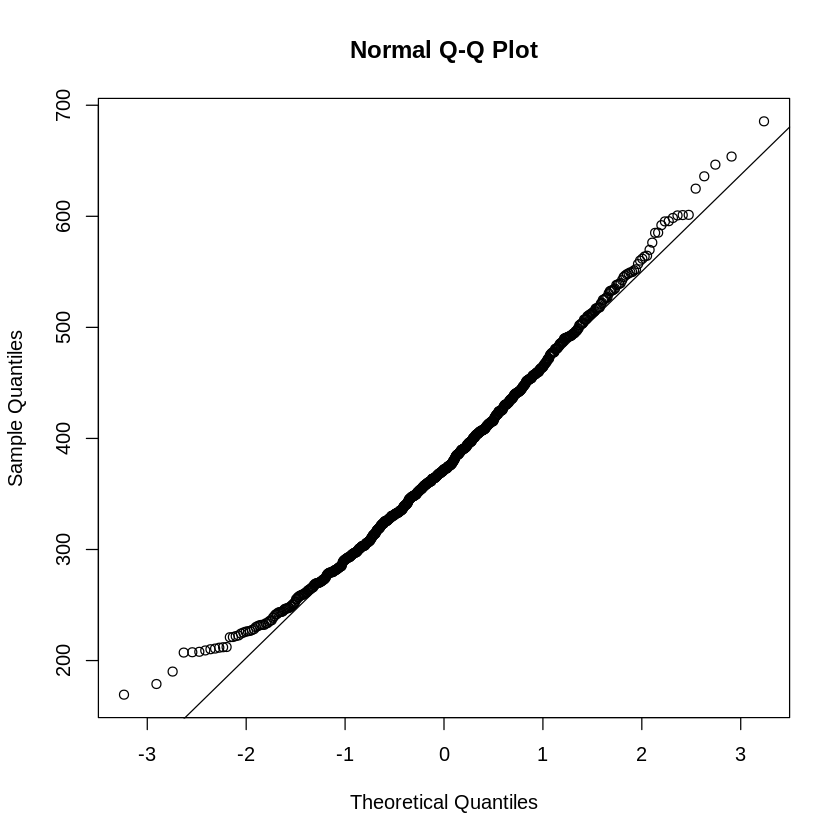

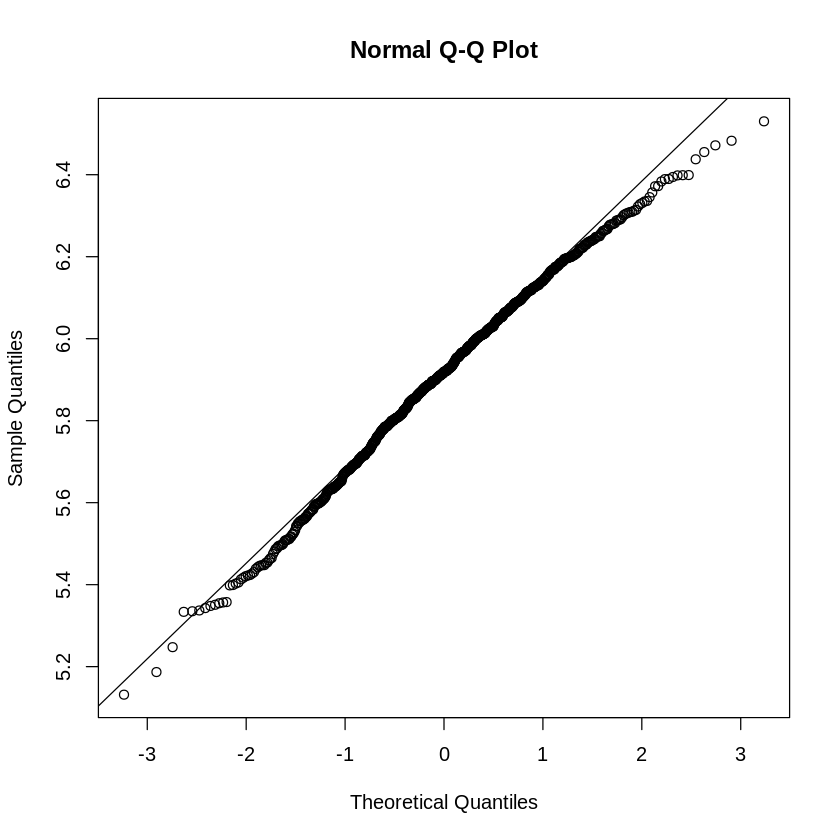

In [9]:
qqnorm(DF$Premature.age.adjusted.mortality.Value); qqline(DF$Premature.age.adjusted.mortality.Value)
qqnorm(DF$log_paamv); qqline(DF$log_paamv)

In [10]:
#linearity improved somewhat in log_paamv compared to Premature.age.adjusted.mortality.Value.  The tails
#were not quite as harsh for log_paamv as they were for Premature.age.adjusted.mortality.Value.

In [11]:
DF1=DF[ , -which(names(DF) %in% c('COUNTYCODE', 'Premature.age...adjusted.mortality Value',
                                             'Premature.death.Value', 'Uninsuredadults.Value', 'Teen.births.Value',
                                             'Food.insecurity.Value', 'Injury.deaths.Value',
                                             'Motor.vehicle.crash.deaths.Value', 'Drug.poisoning.deaths.Value',
                                             'Child.mortality.Value', 'Uninsured.Value'))]

In [12]:
PredictDF <- lm(log_paamv ~ ., data = DF1) 

In [13]:
library(tidyverse)  # data manipulation and visualization
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [14]:
apply(DF1, 2, var)
scaled_df <- apply(DF1, 2, scale)

Poor.or.fair.health.Value 
                                      2.310563e-03 
                   Poor.physical.health.days.Value 
                                      6.356065e-01 
                     Poor.mental.health.days.Value 
                                      5.810259e-01 
                             Low.birthweight.Value 
                                      2.699609e-04 
                               Adult.smoking.Value 
                                      2.403738e-03 
                               Adult.obesity.Value 
                                      1.994324e-03 
                      Food.environment.index.Value 
                                      1.019984e+00 
                         Physical.inactivity.Value 
                                      2.823911e-03 
            Access.to.exercise.opportunities.Value 
                                      2.515368e-02 
                          Excessive.drinking.Value 
                                      1.797353e-03 
             Alcohol.impaired.driving.deaths.Value 
                                      8.116745e-03 
             Sexually.transmitted.infections.Value 
                                      5.494468e+04 
                     Primary.care.physicians.Value 
                                      8.805121e+02 
                                    Dentists.Value 
                                      5.444085e+02 
                     Mental.health.providers.Value 
                                      1.356053e+04 
                  Preventable.hospital.stays.Value 
                                      3.621577e+02 
                          Diabetic.screening.Value 
                                      2.637921e-03 
                       Mammography.screening.Value 
                                      3.676156e-03 
                      High.school.graduation.Value 
                                      7.513407e-03 
                                Some.college.Value 
                                      1.005469e-02 
                                Unemployment.Value 
                                      3.970573e-04 
                         Children.in.poverty.Value 
                                      7.086549e-03 
                           Income.inequality.Value 
                                      4.300125e-01 
        Children.in.single.parent.households.Value 
                                      7.127706e-03 
                         Social.associations.Value 
                                      1.154924e+01 
                               Violent.crime.Value 
                                      4.565962e+04 
          Air.pollution...particulate.matter.Value 
                                      2.057018e+00 
                   Drinking.water.violations.Value 
                                      1.883636e-02 
                     Severe.housing.problems.Value 
                                      1.419138e-03 
                       Driving.alone.to.work.Value 
                                      3.067712e-03 
                Long.commute...driving.alone.Value 
                                      1.241096e-02 
                   X2011.population.estimate.Value 
                                      1.646006e+11 
Population.that.is.not.proficient.in.English.Value 
                                      7.952978e-04 
           Population.living.in.a.rural.area.Value 
                                      4.849015e-02 
                                    Diabetes.Value 
                                      4.713060e-04 
                         HIV.prevalence.rate.Value 
                                      5.108740e+04 
            Premature.age.adjusted.mortality.Value 
                                      7.425753e+03 
                            Infant.mortality.Value 
                                      4.040049e+00 
             Limited.access.to.healthy.foods.Value 
                     

In [15]:
# Calculate eigenvalues & eigenvectors
counties.cov <- cov(scaled_df)
counties.eigen <- eigen(counties.cov)
str(counties.eigen)

List of 2
 $ values : num [1:48] 15.18 6.28 3.79 2.44 1.8 ...
 $ vectors: num [1:48, 1:48] -0.217 -0.183 -0.156 -0.171 -0.172 ...


In [16]:
colnames(DF1)

[1] "Poor.or.fair.health.Value"                         
 [2] "Poor.physical.health.days.Value"                   
 [3] "Poor.mental.health.days.Value"                     
 [4] "Low.birthweight.Value"                             
 [5] "Adult.smoking.Value"                               
 [6] "Adult.obesity.Value"                               
 [7] "Food.environment.index.Value"                      
 [8] "Physical.inactivity.Value"                         
 [9] "Access.to.exercise.opportunities.Value"            
[10] "Excessive.drinking.Value"                          
[11] "Alcohol.impaired.driving.deaths.Value"             
[12] "Sexually.transmitted.infections.Value"             
[13] "Primary.care.physicians.Value"                     
[14] "Dentists.Value"                                    
[15] "Mental.health.providers.Value"                     
[16] "Preventable.hospital.stays.Value"                  
[17] "Diabetic.screening.Value"                          
[18] "Mammography.screening.Value"                       
[19] "High.school.graduation.Value"                      
[20] "Some.college.Value"                                
[21] "Unemployment.Value"                                
[22] "Children.in.poverty.Value"                         
[23] "Income.inequality.Value"                           
[24] "Children.in.single.parent.households.Value"        
[25] "Social.associations.Value"                         
[26] "Violent.crime.Value"                               
[27] "Air.pollution...particulate.matter.Value"          
[28] "Drinking.water.violations.Value"                   
[29] "Severe.housing.problems.Value"                     
[30] "Driving.alone.to.work.Value"                       
[31] "Long.commute...driving.alone.Value"                
[32] "X2011.population.estimate.Value"                   
[33] "Population.that.is.not.proficient.in.English.Value"
[34] "Population.living.in.a.rural.area.Value"           
[35] "Diabetes.Value"                                    
[36] "HIV.prevalence.rate.Value"                         
[37] "Premature.age.adjusted.mortality.Value"            
[38] "Infant.mortality.Value"                            
[39] "Limited.access.to.healthy.foods.Value"             
[40] "Uninsured.adults.Value"                            
[41] "Uninsured.children.Value"                          
[42] "Health.care.costs.Value"                           
[43] "Could.not.see.doctor.due.to.cost.Value"            
[44] "Other.primary.care.providers.Value"                
[45] "Median.household.income.Value"                     
[46] "Children.eligible.for.free.lunch.Value"            
[47] "Homicide.rate.Value"                               
[48] "log_paamv"

In [17]:
(phi <- counties.eigen$vectors[,1:2])
phi <- -phi
row.names(phi) <- c('Poor.or.fair.health.Value', 'Poor.physical.health.days.Value', 'Poor.mental.health.days.Value',
                    'Low.birthweight.Value', 'Adult.smoking.Value', 'Adult.obesity.Value',
                    'Food.environment.index.Value', 'Physical.inactivity.Value',
                    'Access.to.exercise.opportunities.Value', 'Excessive.drinking.Value',
                    'Alcohol.impaired.driving.deaths.Value', 'Sexually.transmitted.infections.Value',
                    'Primary.care.physicians.Value', 'Dentists.Value', 'Mental.health.providers.Value',
                    'Preventable.hospital.stays.Value', 'Diabetic.screening.Value', 'Mammography.screening.Value',
                    'High.school.graduation.Value', 'Some.college.Value', 'Unemployment.Value',
                    'Children.in.poverty.Value', 'Income.inequality.Value',
                    'Children.in.single.parent.households.Value', 'Social.associations.Value', 'Violent.crime.Value',
                    'Air.pollution...particulate.matter.Value', 'Drinking.water.violations.Value',
                    'Severe.housing.problems.Value', 'Driving.alone.to.work.Value',
                    'Long.commute...driving.alone.Value', 'X2011.population.estimate.Value',
                    'Population.that.is.not.proficient.in.English.Value', 'Population.living.in.a.rural.area.Value',
                    'Diabetes.Value', 'HIV.prevalence.rate.Value', 'Premature.age.adjusted.mortality.Value',
                    'Infant.mortality.Value', 'Limited.access.to.healthy.foods.Value', 'Uninsured.adults.Value',
                    'Uninsured.children.Value', 'Health.care.costs.Value', 'Could.not.see.doctor.due.to.cost.Value',
                    'Other.primary.care.providers.Value', 'Median.household.income.Value',
                    'Children.eligible.for.free.lunch.Value', 'Homicide.rate.Value', 'log_paamv')
colnames(phi) <- c("PC1", "PC2")

-0.216801247,0.0356496796
-0.182790766,0.1018722163
-0.156217507,0.0839346236
-0.170853886,-0.1078265157
-0.171804219,0.1427172618
-0.192358610,0.1022655105
0.185549817,0.1800739544
-0.208883416,0.1211655777
0.166036442,-0.1570855323
0.130711106,-0.0401816098
0.003025488,0.0035483324


In [18]:
PC1 <- as.matrix(scaled_df) %*% phi[,1]
PC2 <- as.matrix(scaled_df) %*% phi[,2]

# Create data frame with Principal Components scores
PC <- data.frame(County = row.names(DF), PC1, PC2)

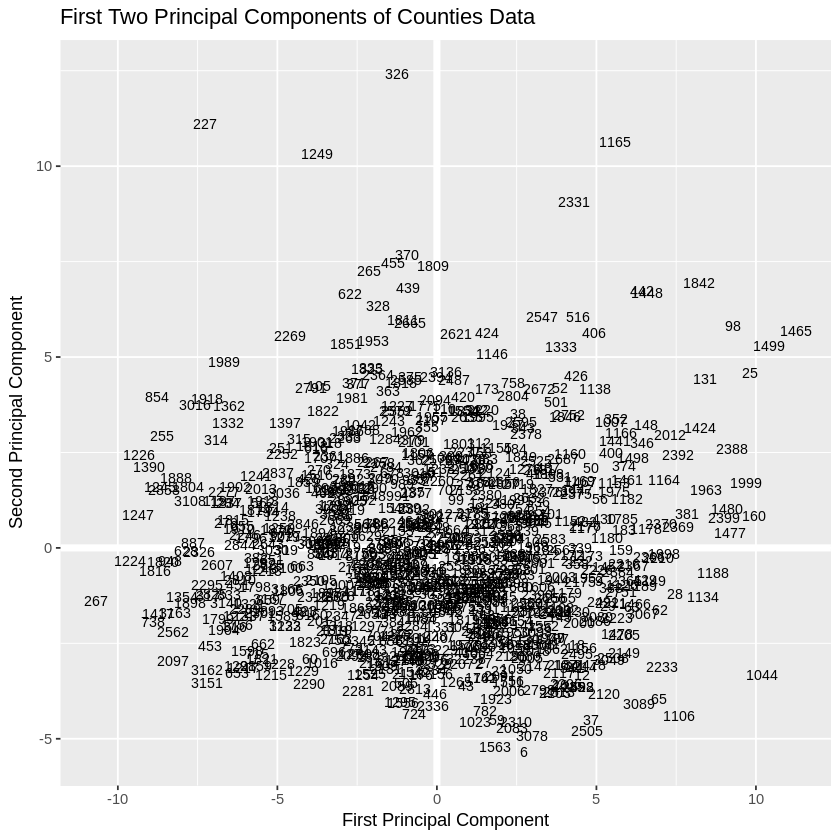

In [19]:
library(ggplot2)
# Plot Principal Components for each County
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = County), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of Counties Data")

In [20]:
PVE <- counties.eigen$values / sum(counties.eigen$values)
round(PVE, 2)

[1] 0.32 0.13 0.08 0.05 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.01 0.01
[16] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
[31] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
[46] 0.00 0.00 0.00

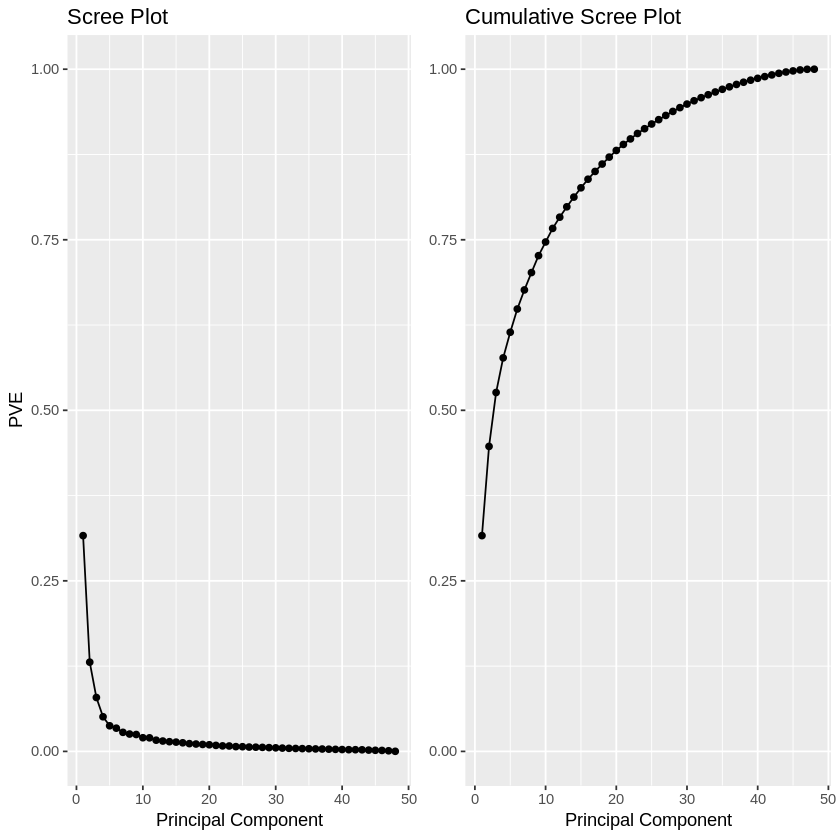

In [21]:
# PVE (aka scree) plot
PVEplot <- qplot(c(1:48), PVE) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("PVE") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

# Cumulative PVE plot
cumPVE <- qplot(c(1:48), cumsum(PVE)) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab(NULL) + 
  ggtitle("Cumulative Scree Plot") +
  ylim(0,1)

grid.arrange(PVEplot, cumPVE, ncol = 2)

In [22]:
#Based upon the analyses run, the first four principal components account for 58% of the variability in the data.
#Poor.or.fair.health.Value and Severe.housing.problems.Value are the two principal components that have the greatest
#effect on log_paamv.

In [23]:
RelevantPredictors <- lm(log_paamv ~ Poor.or.fair.health.Value + Severe.housing.problems.Value, data = DF1) 

In [24]:
anova(PredictDF, RelevantPredictors)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
775,0.5551047,NA,NA,NA,NA
820,18.3912170,-45,-17.83611,553.3685,0


In [25]:
summary(PredictDF)
summary(RelevantPredictors)


Call:
lm(formula = log_paamv ~ ., data = DF1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.115159 -0.012191  0.003342  0.017393  0.094532 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         4.995e+00  6.733e-02
Poor.or.fair.health.Value                          -4.497e-02  4.902e-02
Poor.physical.health.days.Value                     1.907e-03  2.457e-03
Poor.mental.health.days.Value                      -1.365e-03  2.034e-03
Low.birthweight.Value                              -4.840e-01  1.136e-01
Adult.smoking.Value                                 2.189e-01  3.521e-02
Adult.obesity.Value                                 1.110e-01  4.213e-02
Food.environment.index.Value                        5.015e-03  3.657e-03
Physical.inactivity.Value                           3.248e-02  4.317e-02
Access.to.exercise.opportunities.Value              2.621e-02  1.136e-02
Excessive.drinking.Va


Call:
lm(formula = log_paamv ~ Poor.or.fair.health.Value + Severe.housing.problems.Value, 
    data = DF1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62912 -0.09049  0.00275  0.09929  0.47541 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.41905    0.02919 185.638  < 2e-16 ***
Poor.or.fair.health.Value      3.65132    0.10867  33.601  < 2e-16 ***
Severe.housing.problems.Value -0.76943    0.13866  -5.549 3.88e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1498 on 820 degrees of freedom
Multiple R-squared:  0.5858,	Adjusted R-squared:  0.5847 
F-statistic: 579.7 on 2 and 820 DF,  p-value: < 2.2e-16


$2.$ Using the K-means clustering and hirerarchichal clustering, split the counties by the predictor "Adult obesity Value" in three categories (low, medium and high obesity) and run the a new set of PCA and linear regressions, with the PCA regression values, for each split and explain wheter there is a better fit for the data. (20 points)

In [26]:
#install.packages("factoextra")
#library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


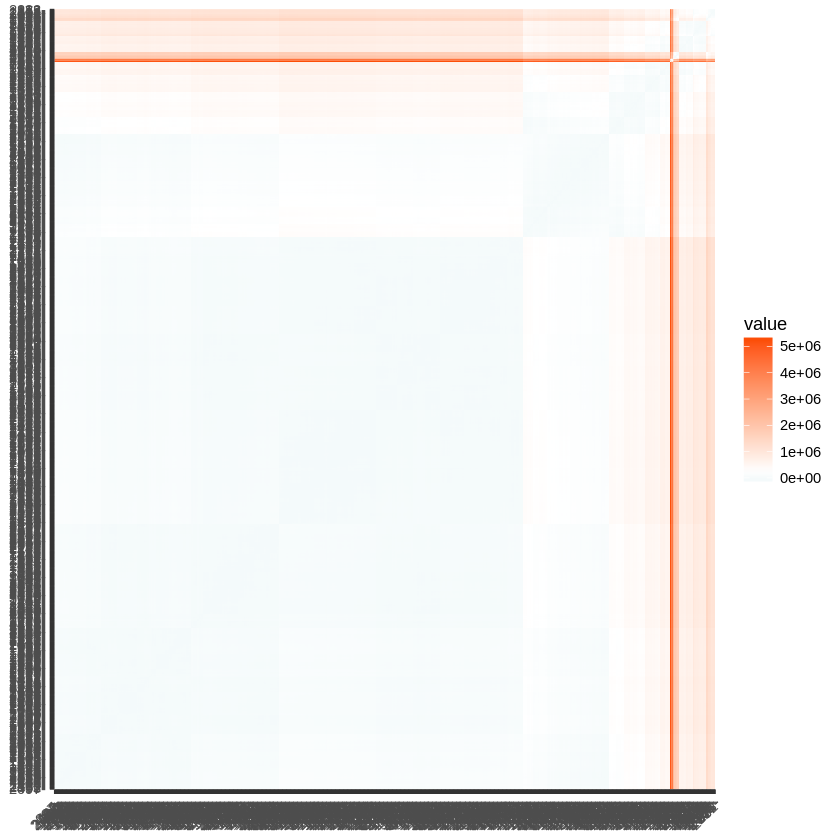

In [27]:
distance <- get_dist(DF1)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07")) ##Red more dissimilar 
#- blue more similar

In [28]:
k2 <- kmeans(DF1$Adult.obesity.Value, centers = 3, nstart = 25)
str(k2)

List of 9
 $ cluster     : int [1:823] 2 3 2 2 1 2 1 1 1 1 ...
 $ centers     : num [1:3, 1] 0.347 0.294 0.235
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : NULL
 $ totss       : num 1.64
 $ withinss    : num [1:3] 0.1317 0.092 0.0922
 $ tot.withinss: num 0.316
 $ betweenss   : num 1.32
 $ size        : int [1:3] 288 378 157
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [29]:
k2

K-means clustering with 3 clusters of sizes 288, 378, 157

Cluster means:
       [,1]
1 0.3472951
2 0.2937407
3 0.2348854

Clustering vector:
  [1] 2 3 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 3 2 3 2
 [38] 2 3 2 2 3 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 2 1 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 [75] 3 3 3 3 2 3 1 3 2 3 3 2 2 3 3 2 2 3 1 2 2 2 1 1 2 2 3 3 1 2 3 2 3 2 3 3 3
[112] 2 2 1 3 2 3 2 3 2 1 3 2 2 3 3 2 2 2 2 2 1 2 2 1 2 2 2 2 3 2 1 3 1 1 3 2 3
[149] 1 1 1 2 2 3 3 2 2 3 2 1 2 1 2 2 1 1 2 1 1 2 2 1 2 2 3 2 2 2 3 3 2 3 3 2 2
[186] 2 3 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2 1 2 2 1 3 2 1 2 1 1 1 1 2 3 2 2
[223] 2 3 1 2 2 2 3 2 2 1 2 3 2 1 1 3 2 1 1 2 2 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2 2
[260] 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1
[297] 1 1 1 1 1 3 2 2 2 2 2 1 1 1 2 2 3 3 1 2 2 1 1 3 3 2 3 2 3 3 3 3 3 1 2 1 1
[334] 1 1 1 2 2 1 2 2 1 2 2 2 1 2 1 2 3 1 2 1 3 1 2 2 3 3 3 3 3 2 3 1 1 1 1 1 2
[371] 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 3 1 2 1 2 1 2 2 2 1 1 

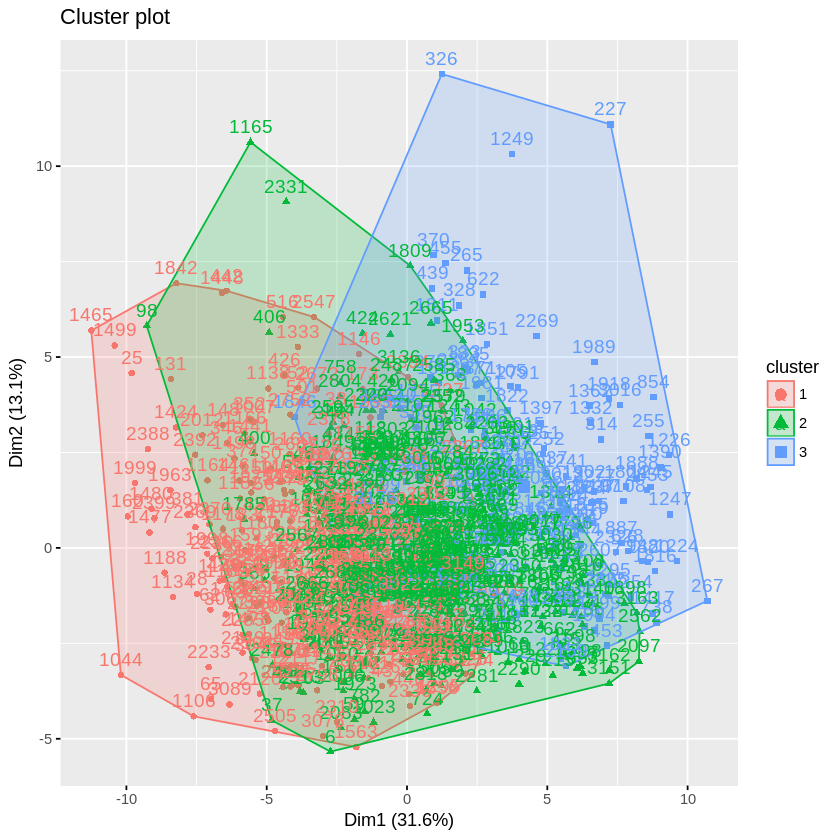

In [30]:
fviz_cluster(k2, data = DF1)

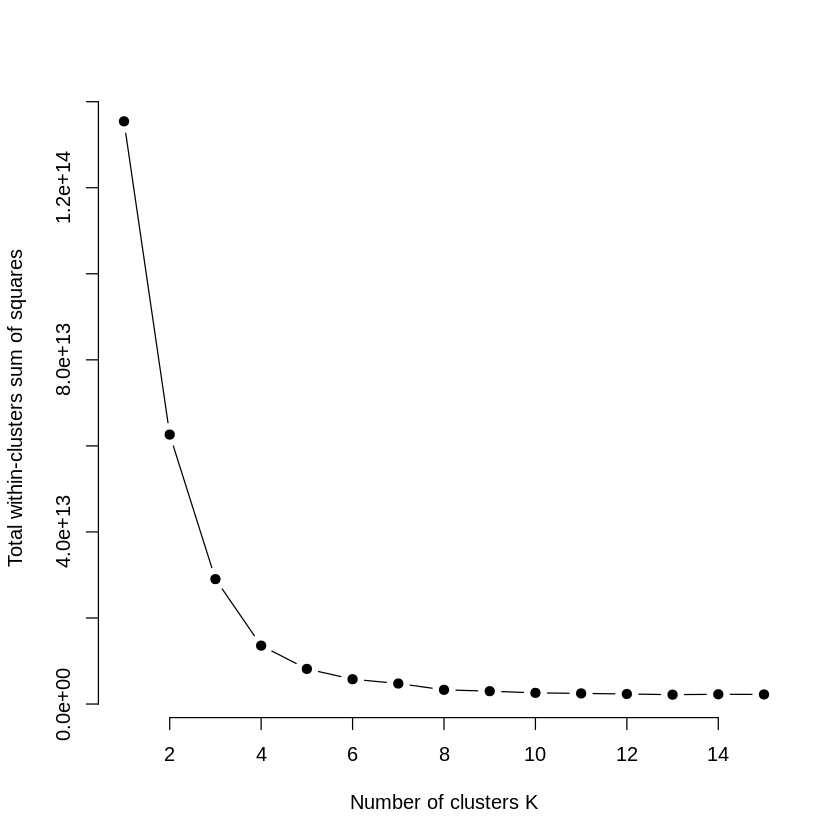

In [31]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(DF1, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

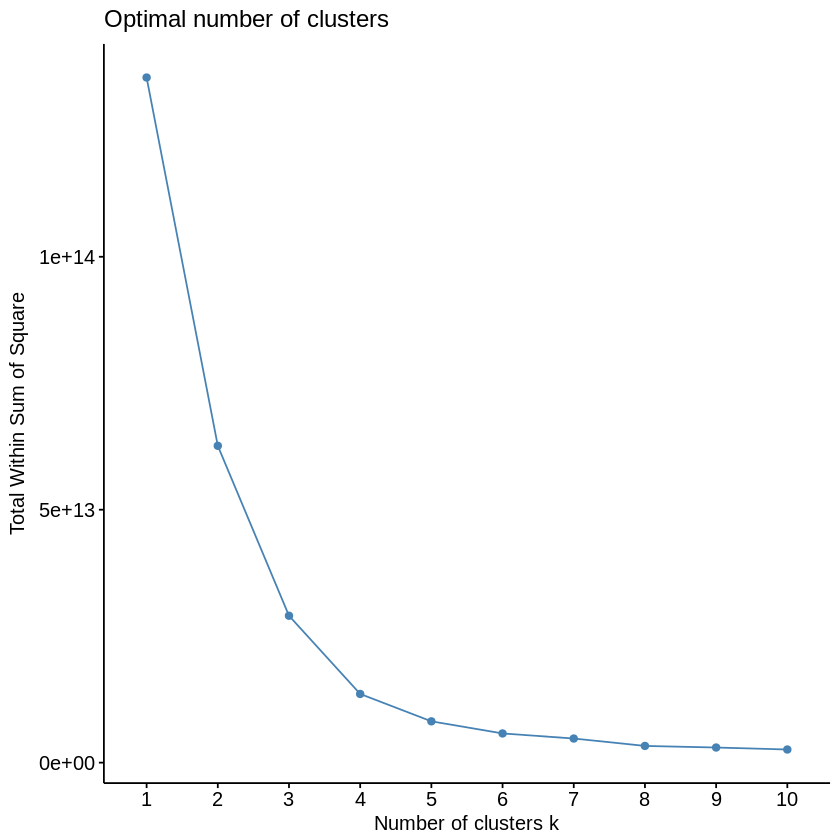

In [32]:
set.seed(123)

fviz_nbclust(DF1, kmeans, method = "wss")

In [33]:
# Compute k-means clustering with k = 4
set.seed(123)
final <- kmeans(DF1, 4, nstart = 25)
print(final)

K-means clustering with 4 clusters of sizes 678, 3, 122, 20

Cluster means:
  Poor.or.fair.health.Value Poor.physical.health.days.Value
1                 0.1737478                        3.916372
2                 0.1626667                        3.433333
3                 0.1400984                        3.340984
4                 0.1413000                        3.385000
  Poor.mental.health.days.Value Low.birthweight.Value Adult.smoking.Value
1                      3.759587            0.08508850           0.2126032
2                      3.333333            0.08333333           0.1660000
3                      3.342623            0.08245902           0.1660410
4                      3.425000            0.08600000           0.1624500
  Adult.obesity.Value Food.environment.index.Value Physical.inactivity.Value
1           0.3087920                     7.016077                 0.2670044
2           0.2533333                     7.066667                 0.2073333
3           0.2673689  

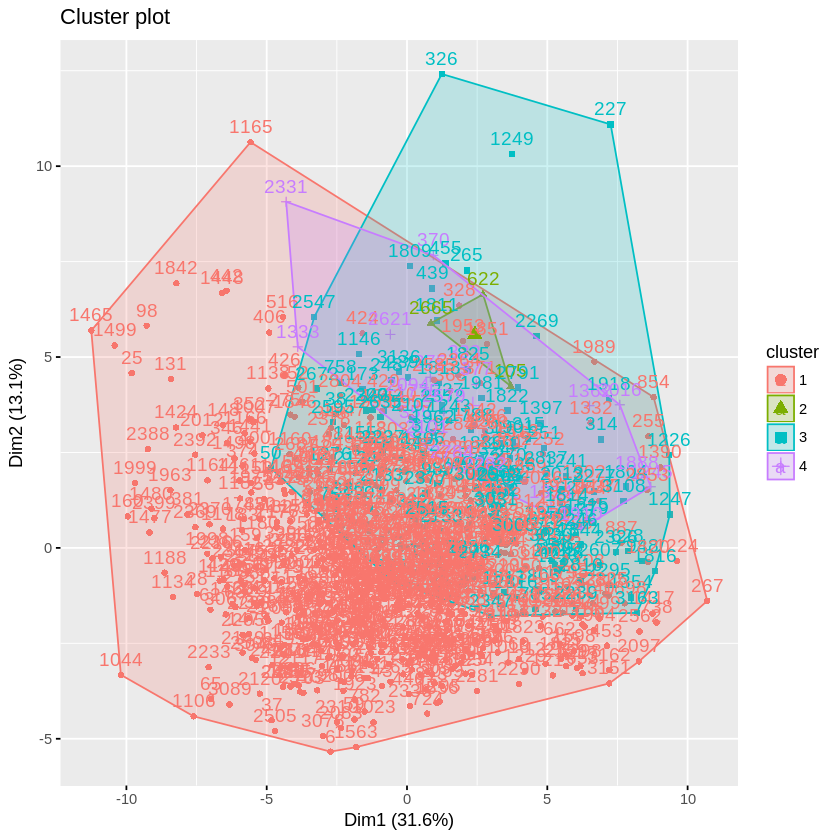

In [34]:
fviz_cluster(final, data = DF1)

In [35]:
by(warpbreaks, warpbreaks[,"tension"],
   function(x) lm(Adult.obesity.Value ~ ., data = DF1))

warpbreaks[, "tension"]: L

Call:
lm(formula = Adult.obesity.Value ~ ., data = DF1)

Coefficients:
                                       (Intercept)  
                                        -7.601e-03  
                         Poor.or.fair.health.Value  
                                         3.172e-02  
                   Poor.physical.health.days.Value  
                                        -6.454e-04  
                     Poor.mental.health.days.Value  
                                        -3.443e-03  
                             Low.birthweight.Value  
                                        -1.614e-01  
                               Adult.smoking.Value  
                                        -4.767e-02  
                      Food.environment.index.Value  
                                        -1.303e-02  
                         Physical.inactivity.Value  
                                         1.674e-01  
            Access.to.exercise.opportunities.Value  


In [36]:
tmp <- with(warpbreaks,
            by(warpbreaks, tension,
               function(x) lm(Adult.obesity.Value ~ ., data = DF1)))
sapply(tmp, coef)

,L,M,H
(Intercept),-7.600875e-03,-7.600875e-03,-7.600875e-03
Poor.or.fair.health.Value,3.172217e-02,3.172217e-02,3.172217e-02
Poor.physical.health.days.Value,-6.454368e-04,-6.454368e-04,-6.454368e-04
Poor.mental.health.days.Value,-3.442517e-03,-3.442517e-03,-3.442517e-03
Low.birthweight.Value,-1.614496e-01,-1.614496e-01,-1.614496e-01
Adult.smoking.Value,-4.767424e-02,-4.767424e-02,-4.767424e-02
Food.environment.index.Value,-1.302568e-02,-1.302568e-02,-1.302568e-02
Physical.inactivity.Value,1.673729e-01,1.673729e-01,1.673729e-01
Access.to.exercise.opportunities.Value,-2.212145e-02,-2.212145e-02,-2.212145e-02
Excessive.drinking.Value,1.166644e-01,1.166644e-01,1.166644e-01


In [37]:
summary(tmp$L)
summary(tmp$M)
summary(tmp$H)


Call:
lm(formula = Adult.obesity.Value ~ ., data = DF1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076372 -0.014841 -0.000019  0.014624  0.077216 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                        -7.601e-03  1.627e-01
Poor.or.fair.health.Value                           3.172e-02  4.162e-02
Poor.physical.health.days.Value                    -6.454e-04  2.086e-03
Poor.mental.health.days.Value                      -3.443e-03  1.723e-03
Low.birthweight.Value                              -1.614e-01  9.741e-02
Adult.smoking.Value                                -4.767e-02  3.058e-02
Food.environment.index.Value                       -1.303e-02  3.073e-03
Physical.inactivity.Value                           1.674e-01  3.616e-02
Access.to.exercise.opportunities.Value             -2.212e-02  9.645e-03
Excessive.drinking.Value                            1.167e-01  2.772e-02
Alcohol.imp


Call:
lm(formula = Adult.obesity.Value ~ ., data = DF1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076372 -0.014841 -0.000019  0.014624  0.077216 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                        -7.601e-03  1.627e-01
Poor.or.fair.health.Value                           3.172e-02  4.162e-02
Poor.physical.health.days.Value                    -6.454e-04  2.086e-03
Poor.mental.health.days.Value                      -3.443e-03  1.723e-03
Low.birthweight.Value                              -1.614e-01  9.741e-02
Adult.smoking.Value                                -4.767e-02  3.058e-02
Food.environment.index.Value                       -1.303e-02  3.073e-03
Physical.inactivity.Value                           1.674e-01  3.616e-02
Access.to.exercise.opportunities.Value             -2.212e-02  9.645e-03
Excessive.drinking.Value                            1.167e-01  2.772e-02
Alcohol.imp


Call:
lm(formula = Adult.obesity.Value ~ ., data = DF1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076372 -0.014841 -0.000019  0.014624  0.077216 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                        -7.601e-03  1.627e-01
Poor.or.fair.health.Value                           3.172e-02  4.162e-02
Poor.physical.health.days.Value                    -6.454e-04  2.086e-03
Poor.mental.health.days.Value                      -3.443e-03  1.723e-03
Low.birthweight.Value                              -1.614e-01  9.741e-02
Adult.smoking.Value                                -4.767e-02  3.058e-02
Food.environment.index.Value                       -1.303e-02  3.073e-03
Physical.inactivity.Value                           1.674e-01  3.616e-02
Access.to.exercise.opportunities.Value             -2.212e-02  9.645e-03
Excessive.drinking.Value                            1.167e-01  2.772e-02
Alcohol.imp

In [46]:
pc = prcomp(DF1)
pc

Standard deviations:
 [1] 4.057248e+05 1.214997e+04 1.235476e+03 2.911992e+02 1.527762e+02
 [6] 1.307058e+02 1.090340e+02 4.929310e+01 3.633794e+01 1.925879e+01
[11] 1.357784e+01 1.176011e+01 2.937277e+00 2.286852e+00 1.441705e+00
[16] 1.210055e+00 6.353889e-01 5.435618e-01 4.515521e-01 3.983044e-01
[21] 1.541208e-01 1.312800e-01 9.167308e-02 8.678475e-02 8.069391e-02
[26] 6.681742e-02 6.176772e-02 5.899117e-02 5.391765e-02 4.502223e-02
[31] 3.939731e-02 3.573343e-02 3.504616e-02 3.390857e-02 2.918942e-02
[36] 2.721318e-02 2.541154e-02 2.309265e-02 2.270134e-02 2.152952e-02
[41] 1.978786e-02 1.938673e-02 1.792073e-02 1.349217e-02 1.297822e-02
[46] 1.147161e-02 9.296778e-03 8.038244e-03

Rotation:
                                                             PC1           PC2
Poor.or.fair.health.Value                          -2.858978e-08 -2.561337e-06
Poor.physical.health.days.Value                    -5.038173e-07 -3.591966e-05
Poor.mental.health.days.Value                      -3.714

In [47]:
pc1 = lm(DF1$Adult.obesity.Value~pc$x[,1]+pc$x[,2]+pc$x[,3])
summary(pc1)


Call:
lm(formula = DF1$Adult.obesity.Value ~ pc$x[, 1] + pc$x[, 2] + 
    pc$x[, 3])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12203 -0.02004  0.00038  0.02253  0.10135 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.013e-01  1.161e-03  259.44   <2e-16 ***
pc$x[, 1]   -3.877e-08  2.864e-09  -13.54   <2e-16 ***
pc$x[, 2]   -1.754e-06  9.563e-08  -18.34   <2e-16 ***
pc$x[, 3]    1.107e-05  9.404e-07   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03331 on 819 degrees of freedom
Multiple R-squared:  0.4456,	Adjusted R-squared:  0.4436 
F-statistic: 219.4 on 3 and 819 DF,  p-value: < 2.2e-16


In [ ]:
#PCA regression is a better fit for the models than linear regression as evidenced by the greater number of 
#matches on the F-statistic; 219.4 on 3 and 819 degrees of freedom, compared to 51.09 on 47 and 775 degrees of freedom
#on the linear regression model.

$3.$ Compare the distributions between Diabetic screening Value and Physical inactivity Value, are these two distributions similar? (10 points)
1. Use the ks test 
2. Run a correlation test to compare these distributions

In [ ]:
require(ggplot2)

In [ ]:
# simulate two distributions - your data goes here!
sample1 <- DF1$Diabetic.screening.Value
sample2 <- DF1$Physical.inactivity.Value
group <- c(rep("sample1", length(sample1)), rep("sample2", length(sample2)))
dat <- data.frame(KSD = c(sample1,sample2), group = group)
# create ECDF of data
cdf1 <- ecdf(sample1) 
cdf2 <- ecdf(sample2) 
# find min and max statistics to draw line between points of greatest distance
minMax <- seq(min(sample1, sample2), max(sample1, sample2), length.out=length(sample1)) 
x0 <- minMax[which( abs(cdf1(minMax) - cdf2(minMax)) == max(abs(cdf1(minMax) - cdf2(minMax))) )] 
y0 <- cdf1(x0) 
y1 <- cdf2(x0) 

In [ ]:
ggplot(dat, aes(x = KSD, group = group, color = group))+
  stat_ecdf(size=1) +
    theme_bw(base_size = 28) +
    theme(legend.position ="top") +
    xlab("Sample") +
    ylab("ECDF") +
    #geom_line(size=1) +
    geom_segment(aes(x = x0[1], y = y0[1], xend = x0[1], yend = y1[1]),
        linetype = "dashed", color = "red") +
    geom_point(aes(x = x0[1] , y= y0[1]), color="red", size=8) +
    geom_point(aes(x = x0[1] , y= y1[1]), color="red", size=8) +
    ggtitle("K-S Test: Diabetic.screening.Value / Physical.inactivity.Value") +
    theme(legend.title=element_blank())

In [ ]:
ks.test(sample1, sample2)

In [ ]:
cor_test <- cor.test(sample1, sample2, 
                method = "pearson")
cor_test

In [ ]:
#The two distributions,Diabetic.screening.Value and Physical.inactivity.Value, are not similar as both the 
#Kolmogorov-Smirnov test and the Pearson's product-moment correlation demonstrate with highly significant p values
#and a negative correlation value.

$4.$ Consider an example of a clinical trial of a proposed stroke-prevention medication.  Suppose 250 participants are randomly assigned to receive either the new drug or a placebo.  The participants are followed over the course of a 5-year period with the following results: (10 points)

|Group	|Stroke	|n|
|---|---|---|
|new drug|	yes	|12|
|new drug|	no	|108|
|placebo|	yes	|28|
|placebo|	no	|102|

	a.  Place new drug/placebo as rows and stroke y/n as columns, what does n1,1 equal?
	b.  What does E1,1 equal? (E is the expected value)
	c.  What is the appropriate test statistic to use?
	d.  Perform the appropriate test.  
	e.  What is the critical value of the test statistic? 
	f.  What do you conclude? 


In [ ]:
#a. Place new drug/placebo as rows and stroke y/n as columns, what does n1,1 equal?
#n1,1 = 12
values = c(12, 108, 28, 102)
colname <- c("Yes Stroke", "No Stroke")
rowname <- c("New Drug", "Placebo")
stroke = matrix(values,nrow = 2, ncol = 2, byrow = T, dimnames=list(rowname,colname))
stroke

In [ ]:
#b.  What does E1,1 equal? (E is the expected value)
#row total* column total / table total
#19.2

In [ ]:
#c.  What is the appropriate test statistic to use?
#the appropriate test statistic to use to see if the drug has an effect on preventing strokes is the odds-ratio.

In [ ]:
#install.packages("vcd")
library(vcd)
odds_rat = oddsratio(stroke, log = FALSE)

In [ ]:
#d.  Perform the appropriate test. 
odds_rat
summary(odds_rat)
confint(odds_rat)

In [ ]:
#e.  What is the critical value of the test statistic?
#the critical value for the odds ratio is 1, meaning if 1 is included in the 95% confidence interval then you
#accept the null hypothesis (there is no difference between new drug and placebo).

In [ ]:
#f.  What do you conclude?
#because 1 is not included in the 95% confidence interval (0.195, 0.839), we reject the null hypothesis
#and accept the alternative hypothesis.  Thus, we can conclude that the new drug does have a protective factor 
#in preventing strokes.

$5.$ In unsupervised machine learning one of the main requirements to run any test is that the outcome variable needs to come from a normal distribution (10 points)

a. True

b. False

In [ ]:
#b. False

$6.$ We will consider data from Stanford Heart Transplant Program, reported by Crowley and Hu (1977). The research question was whether receiving a heart transplant affected survival. 
Starting in November of 1967, 103 patients in need of heart transplant were accepted in the program. Sixty-nine of these patients received a transplant. Seventy-five people had an event, while 28 subjects were censored.  For each person in the program we have the date and age at the acceptance to the program, their de-identified ID, transplant status (and time of transplant if transplant was received), if a subject had a prior bypass surgery, survival time, and if the event occurred or if the subject was censored. These data are included as part of the R survival package (dataset named heart). 

Transplant status is an example of a time-varying covariate. Everybody starts as pre-transplant, then some people live to receive a transplant and others die prior to being able to receive one. If two people died at the same time, but one received a transplant 1 year prior to his death, and the other received a transplant 1 day prior to death, we cannot treat them in the same way. We must appropriately attribute a person’s time to either the “pre-transplant” or “post-transplant” period.
The way to deal with this data is to have 2 records for the patients in the study. One for the pre-transplant time, and another one for post-transplant (those subjects who did not get a transplant will only have one record). 

(20 points)

Covariate descriptions:
start, stop, event:	Entry and exit time and status for this interval of time
age:	age-48 years
year:	year of acceptance (in years after 1 Nov 1967)
surgery:	prior bypass surgery 1=yes
transplant:	received transplant 1=yes
id:	patient id

1. Compare the survival curves from people that recieve a transplant vs people that didn't are these two statistically different?
2. Build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, but ignore the time-varying nature of transplant. Hint(in the Surv object of the model you only need to specify the "stop", and "event" variables)
    - What is the interpretation of the HR for transplant? 
3. Now build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, and take into account the time-varying nature of transplant. Note you need to specify the "start" and "stop" time instead of one single time variable (stop) as you did above (in the Surv object of the model).
    - What is the interpretation of the HR for transplant?
    - Why do you think the results changed after taking into account the time-varying nature of transplant? 

In [ ]:
library(survival)
data(heart)
head(heart)

In [ ]:
install.packages("ggfortify")
library(ggplot2)
library(dplyr)
library(ggfortify)

In [ ]:
#1.  It looks as thought here is a statistical difference between those that received a transplant and those that
#did not.
km_transplant_fit <- survfit(Surv(year, event) ~ transplant, data=heart)
autoplot(km_transplant_fit)

In [ ]:
survdiff(Surv(year, event) ~ transplant, data=heart)

In [ ]:
#2.  Based on the hazard ratio, age is the only variable that increases the hazard(this is to be
#expected, as people get older they are more likely to die anyway).  Receiving a transplant decreases
#the hazard by a factor of 0.5313, which is nearly the same as having had prior surgery as it's hazard ratio is
#0.5309.
cox <- coxph(Surv(stop, event) ~ transplant + age + year + surgery, data = heart)
summary(cox)

In [ ]:
#3.  Taking into account the time variable, the hazard ratios change somewhat.  Age, continues to be the only variable
#that increases the hazard.  However, now that time has been factored in, receiving a transplants HR really changes
#and comes closer to 1, which means it has less of a decrease in hazard than when time was not factored.  In fact,
#having received a transplant's HR in this model is 0.9898, meaning there is almost no decrease in hazard.  The 95%
#confidence interval for having received a transplant runs from 0.5353 (a decrease by factor of 0.5353), up to 
#1.8307 (an increase by a factor of 1.8307).  A possible explanation for this is that because people needing a 
#transplant have to wait, or get older, while waiting to receive the transplant their hazard is increasing already
#due to age.  Also, as people have to wait for a transplant they likely are developing other significant 
#comorbidities that also have an effect on their survival.
cox2 <- coxph(Surv(start, stop, event) ~ transplant + age + year + surgery, data = heart)
summary(cox2)